Lab 5 - TIER Protocol i Tidy data

Dawid Kopeć 405602

Import potrzebnych modułów do obróbki i prezentacji danych

In [58]:
import pandas as pd
import matplotlib.pyplot as plt
import re
from copy import deepcopy

Odczyt danych z oryginalnego pliku

In [59]:
df = pd.read_csv('../OriginalData/10_Pomorskie.csv', index_col=0)
#df.Marka.hist(bins=10)
#df.Marka.hist(bins=?)

Usunięcie ze zbioru danych uznanych za niepoprawne - brak zedefiniowanej płci.

In [60]:
df.drop(df.loc[df['Płeć kupującego']=='bd.'].index, inplace=True)
df

,Dni od zakupu,Marka,Wiek kupującego,Płeć kupującego,Ocena
3,14,Tefal,48.0,K,2.5
5,5,Samsung,50.0,M,1.5
6,7,Electrolux,40.0,M,2.0
7,10,Tefal,32.0,K,3.0
11,6,Samsung,40.0,M,2.5
...,...,...,...,...,...
541,6,Beko,41.0,M,2.0
545,4,Tefal,28.0,K,3.0
549,7,Samsung,62.0,M,4.0
550,2,Tefal,37.0,K,4.0


Wykres przedstawiający oceny klientów w przedziałach 0-5 z krokiem 1

C    91
B    84
D    66
A    34
E     9
Name: grade, dtype: int64


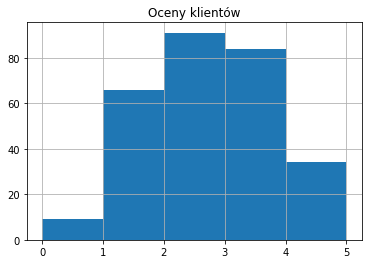

In [61]:
df.Ocena.hist(bins=5)
plt.title('Oceny klientów')

df_grade = deepcopy(df)
df_grade.loc[df['Ocena'].between(0, 1, 'left'), 'grade'] = 'E'
df_grade.loc[df['Ocena'].between(1, 2, 'left'), 'grade'] = 'D'
df_grade.loc[df['Ocena'].between(2, 3, 'left'), 'grade'] = 'C'
df_grade.loc[df['Ocena'].between(3, 4, 'left'), 'grade'] = 'B'
df_grade.loc[df['Ocena'].between(4, 5, 'both'), 'grade'] = 'A'

plt.savefig("../Analysis Data/Score_groups.png")

print(df_grade.grade.value_counts())

Wykres reprezentujący ocenę w zależności od marki

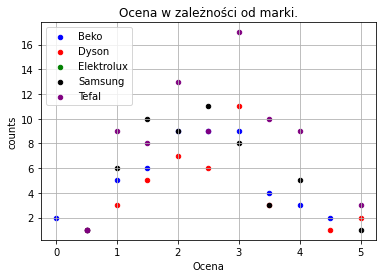

<Figure size 432x288 with 0 Axes>

In [67]:
df_brands_by_grade = df[['Ocena', 'Marka']].value_counts().reset_index()
df_brands_by_grade.columns = ['Ocena', 'Marka', 'counts']
df_brands_by_grade = df_brands_by_grade.sort_values(by='Marka')

df_brands_by_grade

ax = plt.gca()
df_brands_by_grade[df_brands_by_grade['Marka'] == 'Beko'].plot(kind='scatter', x='Ocena', y='counts', color='blue', ax=ax, title='Ocena w zależności od marki.')
df_brands_by_grade[df_brands_by_grade['Marka'] == 'Dyson'].plot(kind='scatter', x='Ocena', y='counts', color='red', ax=ax)
df_brands_by_grade[df_brands_by_grade['Marka'] == 'Elektrolux'].plot(kind='scatter', x='Ocena', y='counts', color='green', ax=ax)
df_brands_by_grade[df_brands_by_grade['Marka'] == 'Samsung'].plot(kind='scatter', x='Ocena', y='counts', color='black', ax=ax)
df_brands_by_grade[df_brands_by_grade['Marka'] == 'Tefal'].plot(kind='scatter', x='Ocena', y='counts', color='purple', ax=ax)
plt.legend(['Beko', 'Dyson', 'Elektrolux', 'Samsung', 'Tefal'], loc=2)
plt.grid()
plt.show()
plt.savefig("../Analysis Data/Score_by_brand.png")


Wykres reprezentujący udział liczbowy klientów w zakupie danej marki z uwzględnieniem płci.


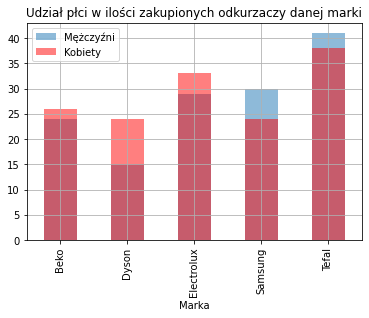

,Płeć kupującego,Marka,counts
5,K,Beko,26
8,M,Beko,24
6,K,Dyson,24
9,M,Dyson,15
2,K,Electrolux,33
4,M,Electrolux,29
3,M,Samsung,30
7,K,Samsung,24
0,M,Tefal,41
1,K,Tefal,38


<Figure size 432x288 with 0 Axes>

In [68]:
df_brands_by_sex = df[['Płeć kupującego', 'Marka']].value_counts().reset_index()
df_brands_by_sex.columns = ['Płeć kupującego', 'Marka', 'counts']
df_brands_by_sex = df_brands_by_sex.sort_values(by='Marka')

ax = plt.gca()
df_brands_by_sex[df_brands_by_sex['Płeć kupującego'] == 'M'].plot(kind='bar', x='Marka', y='counts', alpha=0.5, ax=ax, title='Udział płci w ilości zakupionych odkurzaczy danej marki')
df_brands_by_sex[df_brands_by_sex['Płeć kupującego'] == 'K'].plot(kind='bar', x='Marka', y='counts', color = 'red', alpha=0.5, ax=ax)
plt.legend(['Mężczyźni', 'Kobiety'])
plt.grid()
plt.show()
plt.savefig("../Analysis Data/Brand_by_sex.png")

df_brands_by_sex

Wykres reprezentujący ilość klientów w poszczególnych grupach wiekowych

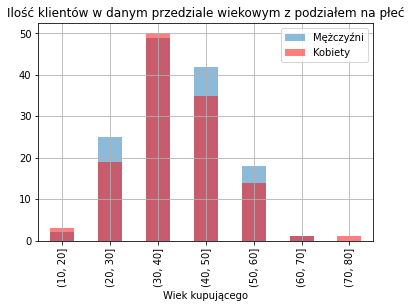

<Figure size 432x288 with 0 Axes>

In [64]:
df_by_age_female = deepcopy(df[df['Płeć kupującego'] == 'K'].groupby(pd.cut(df['Wiek kupującego'], [10,20,30,40,50,60,70,80])).count())
df_by_age_female = df_by_age_female.drop(['Dni od zakupu', 'Marka', 'Wiek kupującego', 'Płeć kupującego'], axis=1)
df_by_age_female = df_by_age_female.rename(columns={'Ocena' : 'counts'})
df_by_age_male = deepcopy(df[df['Płeć kupującego'] == 'M'].groupby(pd.cut(df['Wiek kupującego'], [10,20,30,40,50,60,70,80])).count())
df_by_age_male = df_by_age_male.drop(['Dni od zakupu', 'Marka', 'Wiek kupującego', 'Płeć kupującego'], axis=1)
df_by_age_male = df_by_age_male.rename(columns={'Ocena' : 'counts'})

ax = plt.gca()
df_by_age_female.plot(kind='bar', y='counts', alpha=0.5, ax=ax, title='Ilość klientów w danym przedziale wiekowym z podziałem na płeć')
df_by_age_male.plot(kind='bar', y='counts', color = 'red', alpha=0.5, ax=ax)
plt.legend(['Mężczyźni', 'Kobiety'])

plt.grid()
plt.show()
plt.savefig("../Analysis Data/Age_groups.png")

Wykres reprezentujący ilość dni która upłynęła od ostatniego zakupu.

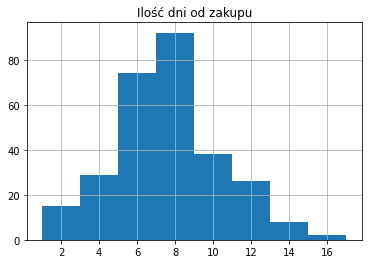

In [65]:
df['Dni od zakupu'].hist(bins=8)
plt.title('Ilość dni od zakupu')
plt.savefig("../Analysis Data/Days_elapsed.png")